In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [75]:
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.8, 16))[::2]
colors = np.flip(colors, axis=0)

In [76]:
name_dict = {
    'countsketch_scatter': ('TensorSketch', colors[4]),
    'rademacher': ('Rademacher', colors[2]),
    'ctr_rademacher': ('CtR-Rademacher', colors[3]),
    'gaussian': ('Gaussian', colors[0]),
    'ctr_gaussian': ('CtR-Gaussian', colors[1]),
    'srht': ('ProductSRHT', colors[5]),
    'ctr_srht': ('CtR-ProductSRHT', colors[6])
}

In [77]:
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (12, 3), # 2.2*len(csvs)
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large',
    'xtick.major.size': 7.0,
    'ytick.major.size': 3.0
}
pylab.rcParams.update(params)

## Plot bound over p

In [78]:
import scipy.special

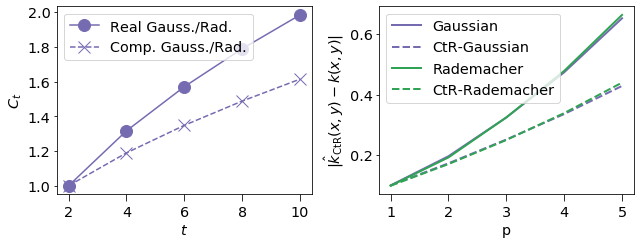

In [92]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(9, 3.5))

bound_data = pd.read_csv('../csv/bound_plot/over_p_samples_1000_seeds_10000_d64.csv')
bound_data = bound_data[bound_data['p'] <= 5.0]

def comp_moments(t):
    return scipy.special.gamma(t/2 + 1)**(1/t)
    
def real_moments(t):
    return scipy.special.gamma((t + 1)/2.0)**(1/t) * np.sqrt(2) * np.pi**(-1/(2*t))

ts = np.arange(2, 11, 2)
axes[0].plot(ts, real_moments(ts), color=name_dict['ctr_gaussian'][1], linestyle='solid', label='Real Gauss./Rad.', marker='o', ms=12)
axes[0].plot(ts, comp_moments(ts), color=name_dict['ctr_gaussian'][1], linestyle='dashed', label='Comp. Gauss./Rad.', marker='x', ms=12)
axes[0].set_xticks(ts)
axes[0].set_xlabel(r'$t$')
axes[0].set_ylabel(r'$C_t$')
axes[0].legend()

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'ctr_'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            axes[1].plot(
                curve_data['p'],
                curve_data['error_prob'],
#                 yerr=curve_data['error_std'],
                label=name_dict[pref+proj][0],
                color=name_dict['ctr_'+proj][1],
                linewidth=2,
                linestyle='dashed' if comp_real else 'solid'
            )
#             plt.errorbar(curve_data['p'], curve_data['error_prob'], yerr=curve_data['error_std'], label=pref + name_dict[proj])

# handles, labels = axes[0].get_legend_handles_labels()
axes[1].legend()
axes[1].set_xticks([1,2,3,4,5])
axes[1].set_xlabel('p')
axes[1].set_ylabel(r'$| \hat{k}_{\rm CtR}(x,y) - k(x,y)|$')

plt.tight_layout()

# legend = plt.figlegend(handles=handles, labels=labels, loc='upper center', ncol=4, bbox_to_anchor = (0,0.35,1.01,0.85), bbox_transform=plt.gcf().transFigure)
# plt.savefig('../figures/moment_bound.pdf', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

## Plot Bound over D

In [3]:
bound_data['proj'].unique()

NameError: name 'bound_data' is not defined

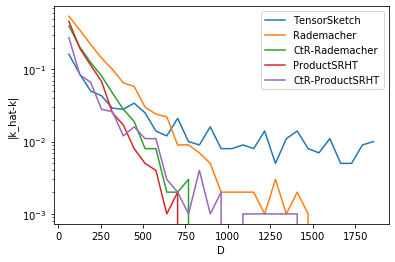

In [44]:
# d=2

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_1000_d2.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

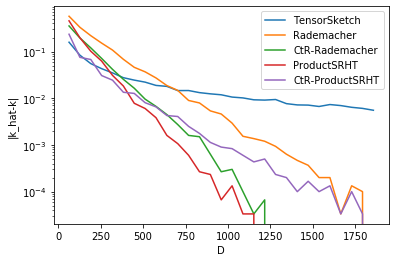

In [7]:
# d=2

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_30000_d2.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

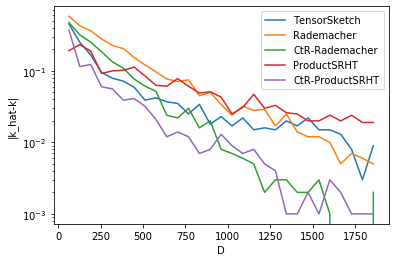

In [45]:
# d=4

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_1000_d4.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

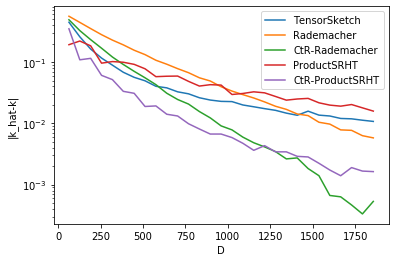

In [5]:
# d=4

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_30000_d4.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

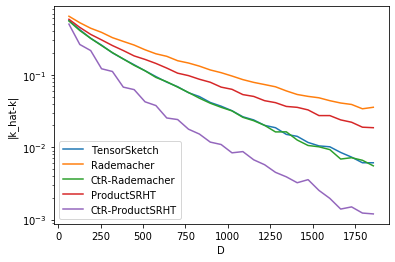

In [14]:
# d=64

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_30000_d64.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
plt.savefig('figures/max_err_vs_sparsity.pdf', dpi=300)

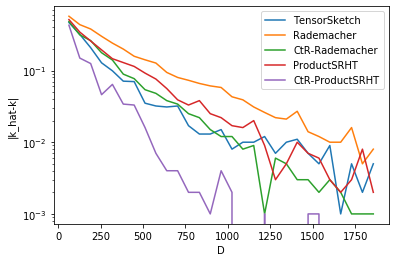

In [11]:
# d=2

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_1000_d64_2.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

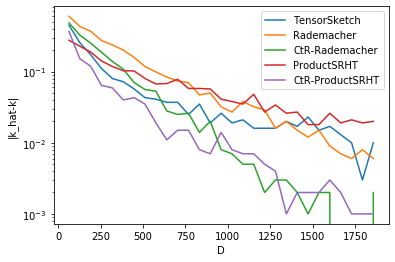

In [8]:
# d=4

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_1000_d64_2.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

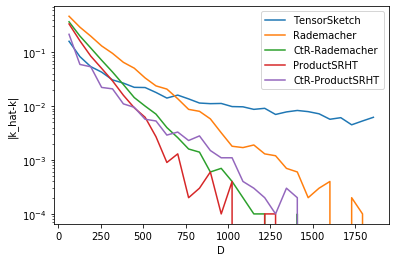

In [5]:
# d=2

bound_data = pd.read_csv('../csv/bound_plot/over_D_samples_1000_seeds_10000_d64_2.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['D'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('D')
plt.ylabel('|k_hat-k|')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
over_D_samples_{}_seeds_{}_d{}_2

## Plot bound over d

In [6]:
bound_data = pd.read_csv('../csv/bound_plot/over_sparsity_samples_1000_seeds_10000.csv')

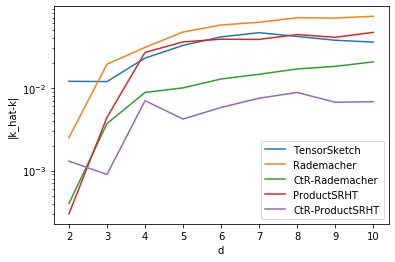

In [59]:
for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['d'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('d')
plt.ylabel('|k_hat-k|')
plt.yscale('log')#
plt.legend()
plt.show()

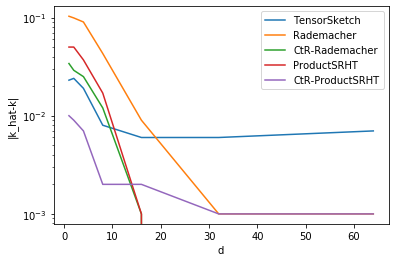

In [9]:
bound_data = pd.read_csv('../csv/bound_plot/over_sparsity_samples_1000_seeds_1000.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['d'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('d')
plt.ylabel('|k_hat-k|')
plt.yscale('log')#
plt.legend()
plt.show()

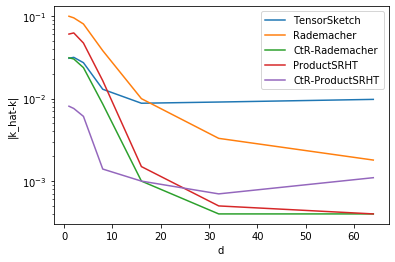

In [10]:
bound_data = pd.read_csv('../csv/bound_plot/over_sparsity_samples_1000_seeds_10000.csv')

for proj in bound_data['proj'].unique():
    for comp_real in [False, True]:
        curve_data = bound_data[(bound_data['proj'] == proj) & (bound_data['complex_real'] == comp_real)]
        if comp_real:
            pref = 'CtR-'
        else:
            pref = ''
        
        if len(curve_data) > 0:
            plt.plot(curve_data['d'], curve_data['error_prob'], label=pref + name_dict[proj])
            
# plt.xticks(Ds)
plt.xlabel('d')
plt.ylabel('|k_hat-k|')
plt.yscale('log')#
plt.legend()
plt.show()